In [40]:
import os
import random

import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow

from PIL import Image

In [5]:
os.getcwd()

'/Users/christophrico/Documents/mushie-classifier'

---
# Ingest and EDA

All these data have been scraped from Mushroom.world by using our image scraper, located in the [dataset folder](https://github.com/Edible-ai/mushie-classifier/blob/main/dataset/bs_scraper.py).

In [6]:
mushie_data = pd.read_csv("./dataset/mushie_image_data/_scraped_data.csv")

   Unnamed: 0         latin_name    english_name        edibility  \
0           0  Agaricus arvensis  Horse Mushroom  Edible and good   
1           1  Agaricus arvensis  Horse Mushroom  Edible and good   
2           2  Agaricus arvensis  Horse Mushroom  Edible and good   
3           3  Agaricus arvensis  Horse Mushroom  Edible and good   
4           4  Agaricus arvensis  Horse Mushroom  Edible and good   

                filename                                  mushroomworld_url  \
0  Agaricusarvensis1.JPG  http://www.mushroom.world/show?n=Agaricus-arve...   
1  Agaricusarvensis2.JPG  http://www.mushroom.world/show?n=Agaricus-arve...   
2  Agaricusarvensis3.JPG  http://www.mushroom.world/show?n=Agaricus-arve...   
3  Agaricusarvensis4.JPG  http://www.mushroom.world/show?n=Agaricus-arve...   
4  Agaricusarvensis5.JPG  http://www.mushroom.world/show?n=Agaricus-arve...   

                                           image_url  
0  http://www.mushroom.world/data/fungi/Agaricusa...  


In [8]:
mushie_data.head(10)

,Unnamed: 0,latin_name,english_name,edibility,filename,mushroomworld_url,image_url
0,0,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis1.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...
1,1,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis2.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...
2,2,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis3.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...
3,3,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis4.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...
4,4,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis5.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...
5,0,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus1.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...
6,1,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus2.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...
7,2,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus3.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...
8,3,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus4.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...
9,0,Albatrellus confluens\n \n\n,NaN,Inedible,Albatrellusconfluens1.JPG,http://www.mushroom.world/show?n=Albatrellus-c...,http://www.mushroom.world/data/fungi/Albatrell...


In [11]:
mushie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   latin_name         659 non-null    object
 1   english_name       632 non-null    object
 2   edibility          659 non-null    object
 3   filename           659 non-null    object
 4   mushroomworld_url  659 non-null    object
 5   image_url          659 non-null    object
dtypes: object(6)
memory usage: 31.0+ KB


In [10]:
# Get rid of the useless columns
mushie_data.drop("Unnamed: 0", 1, inplace=True)

In [13]:
# Let's see how many of each edibility type we have
mushie_data['edibility'].value_counts()

Inedible                246
Edible                  198
Poisonous                96
Edible and good          50
Lethally poisonous       27
Edible and excellent     24
Edible when boiled       18
Name: edibility, dtype: int64

We want each mushroom to be classified as either "edible" or "poisonous", so we create a new column to map these values.

In [19]:
edibility_mapping = {
                     "Inedible"             : "poisonous",
                     "Edible"               : "edible",
                     "Poisonous"            : "poisonous",
                     "Edible and good"      : "edible",
                     "Lethally poisonous"   : "poisonous",
                     "Edible and excellent" : "edible",
                     "Edible when boiled"   : "edible"
                    }

mushie_data["edibility_bin"] = mushie_data["edibility"].map(edibility_mapping)
mushie_data.head(15)

,latin_name,english_name,edibility,filename,mushroomworld_url,image_url,edibility_bin
0,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis1.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
1,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis2.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
2,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis3.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
3,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis4.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
4,Agaricus arvensis,Horse Mushroom,Edible and good,Agaricusarvensis5.JPG,http://www.mushroom.world/show?n=Agaricus-arve...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
5,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus1.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
6,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus2.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
7,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus3.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
8,Agaricus augustus,The Prince,Edible and good,Agaricusaugustus4.jpg,http://www.mushroom.world/show?n=Agaricus-augu...,http://www.mushroom.world/data/fungi/Agaricusa...,edible
9,Albatrellus confluens\n \n\n,NaN,Inedible,Albatrellusconfluens1.JPG,http://www.mushroom.world/show?n=Albatrellus-c...,http://www.mushroom.world/data/fungi/Albatrell...,poisonous


In [17]:
# Let's see how many of each binary edibility type we have
mushie_data['edibility_bin'].value_counts()

Poisonous    369
Edible       290
Name: edibility_bin, dtype: int64

In [29]:
# Now we can split the images up into their respective categories
path = "./dataset/mushie_image_data"

# make the category folders if they don't already exist
if not os.path.exists(path + "/edible"):
    os.makedirs(path + "/edible")
if not os.path.exists(path + "/poisonous"):
    os.makedirs(path + "/poisonous")        

In [34]:
# now sort each one based on the category in the df
for image in os.listdir(path):
    if image.endswith(".JPG") or image.endswith(".jpg"):
        #get the original filepath
        source = "{}/{}".format(path, image)
        
        #make a new one based on the category assigned in the dataframe
        category = mushie_data.loc[mushie_data['filename']==image, 'edibility_bin'].iloc[0]
        dest = "{}/{}/{}".format(path, category, image)
        
        #now rename the file to the new path
        os.rename(source, dest)

---
# Image Data
Let's take a look at a few pictures of the shrooms to get a better idea of what each looks like. Rerun each cell to get a random image.

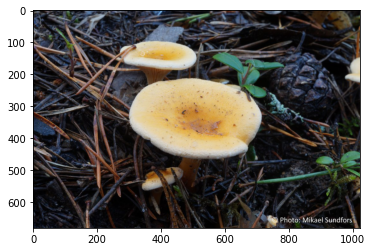

In [49]:
# Poisonous
files = os.listdir(path + "/poisonous")

d = random.choice(files)
pil_im = Image.open(path + "/poisonous/" + d, "r")
imshow(np.asarray(pil_im))

In [ ]:
# Edible 
files = os.listdir(path + "/poisonous")

d = random.choice(files)
pil_im = Image.open(path + "/poisonous/" + d, "r")
imshow(np.asarray(pil_im))